In [11]:
import os
import json
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
os.getcwd()

'C:\\Users\\Danie\\ITNPBD2-assignment-1'

In [5]:
os.chdir("C:\\Users\\Danie")

# Initial data exploration and cleaning

I started by loading the csv and json files into panda data frames to begin understanding the datasets.

From these initial observations, I began cleaning the data.

## Products.csv initial exploration

In [181]:
products_csv = pd.read_csv("products.csv")
#display(products_csv.head()) 
#display commented out for readability
print(products_csv.shape)
print(products_csv.count()) #Using the count function has showed that the SKU, Description, and Price columns are missing some data
print(products_csv.isnull().sum()) #Further to the .count() funtion, I am finding out how many values are missing from each column
print(products_csv.dtypes)


(7982, 6)
Uniq_id        7982
SKU            7915
Name           7982
Description    7439
Price          5816
Av_Score       7982
dtype: int64
Uniq_id           0
SKU              67
Name              0
Description     543
Price          2166
Av_Score          0
dtype: int64
Uniq_id         object
SKU             object
Name            object
Description     object
Price          float64
Av_Score       float64
dtype: object


## Users.csv initial exploration

In [182]:
users = pd.read_csv("users.csv")
#display(users.head())
print(users.shape)
print(users.isnull().sum()) #Checking for missing values
print(users.dtypes)

(5000, 3)
Username    0
DOB         0
State       0
dtype: int64
Username    object
DOB         object
State       object
dtype: object


## Reviews.csv initial exploration

In [183]:
reviews_csv = pd.read_csv("reviews.csv")
#display(reviews_csv.head())
print(reviews_csv.shape)
print(reviews_csv.isnull().sum())
print(reviews_csv.dtypes)

(39063, 4)
Uniq_id     0
Username    0
Score       0
Review      0
dtype: int64
Uniq_id     object
Username    object
Score        int64
Review      object
dtype: object


## jcpenney_products.json initial exploration

I decided to use this dataframe to calculate average product ratings because there are differences in the review values between this set and the CSV file.

In [ ]:
products_json = pd.read_json("jcpenney_products.json", lines = True)
#display(products_json.head())
print(products_json.shape)
print(products_json.count())
print(products_json.isnull().sum())
print(products_json.dtypes)


In [44]:
products_json.replace("", np.nan, inplace=True)
print(products_json.isnull().sum()) #Finding out where missing values are

uniq_id                      0
sku                         67
name_title                   0
description                543
list_price                2166
sale_price                  18
category                   636
category_tree              636
average_product_rating       0
product_url                  0
product_image_urls         157
brand                        0
total_number_reviews         0
Reviews                      0
Bought With                  0
dtype: int64


In [185]:
reviews_json = pd.read_json("jcpenney_reviewers.json", lines=True)
#display(reviews_json.head())
print(reviews_json.shape)
print(reviews_json.count())
print(reviews_json.isnull().sum())


(5000, 4)
Username    5000
DOB         5000
State       5000
Reviewed    5000
dtype: int64
Username    0
DOB         0
State       0
Reviewed    0
dtype: int64


In [45]:
reviews_json.replace("", np.nan, inplace=True)
print(reviews_json.isnull().sum()) #Finding out where missing values are

Username    0
DOB         0
State       0
Reviewed    0
dtype: int64


## Cleaning data set and creating a subset to visualise top reviewed products

Cleaning products JSON file

In [57]:
products_json.replace("", np.nan, inplace=True)
print(products_json.isnull().sum())

print(products_json.dtypes)

uniq_id                      0
sku                         67
name_title                   0
description                543
list_price                2166
sale_price                 263
category                   636
category_tree              636
average_product_rating       0
product_url                  0
product_image_urls         157
brand                        0
total_number_reviews         0
Reviews                      0
Bought With                  0
dtype: int64
uniq_id                    object
sku                        object
name_title                 object
description                object
list_price                float64
sale_price                float64
category                   object
category_tree              object
average_product_rating    float64
product_url                object
product_image_urls         object
brand                      object
total_number_reviews        int64
Reviews                    object
Bought With                object
dtype: objec

In [129]:
#Changing datatype to float

products_json["list_price"] = products_json["list_price"].astype(float)

In [130]:
#When I initially ran the function to convert object to float, there was an error because some prices were in ranges.

products_json["sale_price"] = pd.to_numeric(products_json["sale_price"], errors = "coerce") 

In [131]:
#Changing datatype to float

products_json["sale_price"] = products_json["sale_price"].astype(float)

## Creating subset of Products JSON to show true average value by SKU

In [85]:
products_json["sku"] = products_json["sku"].astype(str) 
#I was getting an error when running the code in cell 81, converting to a str fixed this

In [137]:
#Creating a more manageable subset to group the SKU's and get an overall mean for each

subset = products_json[["sku","average_product_rating","total_number_reviews"]]

#Removing empty values in sku column

subset = subset[subset["sku"] != "nan"]

In [186]:
#display(subset.head())
print(subset.dtypes)

total_av         float64
total_reviews      int64
dtype: object


In [139]:
# There are muptiple rows for each sku so I am grouping them together and caluclating the average of the 
#"average_product_ rating" to get an average rating for each product

subset = subset.groupby("sku").agg(
    total_av = ("average_product_rating","mean"), 
    total_reviews = ("total_number_reviews","sum"))

In [140]:
#Sorting to see which products have the most reviews

subset_sorted = subset.sort_values(by = "total_reviews", ascending = False)
display(subset_sorted)

,total_av,total_reviews
sku,,
pp5004560042,2.777778,144
pp5006210554,3.125000,144
pp5005870510,3.057692,104
pp5006210555,3.050595,81
pp5005840398,3.075000,80
...,...,...
pp5007360105,3.000000,1
pp5007360113,1.000000,1
pp5007440264,1.000000,1


In [141]:
print(sum(subset_sorted["total_reviews"] > 10))
# I recognised above that if I were to plot the subset that the data would be skewed by the products which only have 1 review.
# Therefore, I decided to only plot products which have more than 10 reviews = 798 products

798


In [142]:
x = subset_sorted["total_reviews"] > 10

In [162]:
# Creating a new sub set with products which have more than 10 reviews

top_reviewed = subset_sorted[x].reset_index()

# Sorting by highest average review

top_reviewed_ordered = top_reviewed.sort_values(by = "total_av", ascending = False)

# Creating smaller subsets of the top and bottom 25 products by average review so that they fit on a bar chart

top_25 = top_reviewed_ordered.head(25)

bottom_25 = top_reviewed_ordered.tail(25)


In [154]:
display(top_reviewed_ordered)

,sku,total_av,total_reviews
258,pp5005130029,3.950000,20
794,pp5006440008,3.895833,11
337,pp5006462155,3.875000,16
448,pp5006153362,3.875000,16
629,pp5005640818,3.857143,14
...,...,...,...
425,pp5006640562,2.125000,16
777,pp5006620365,2.090909,11
526,pp5006310918,2.062500,16
471,pp5006320143,2.062500,16


In [145]:
import matplotlib.pyplot as plt
%matplotlib inline

## Creating a visualisation to look at the top and bottom 25 products by average user rating

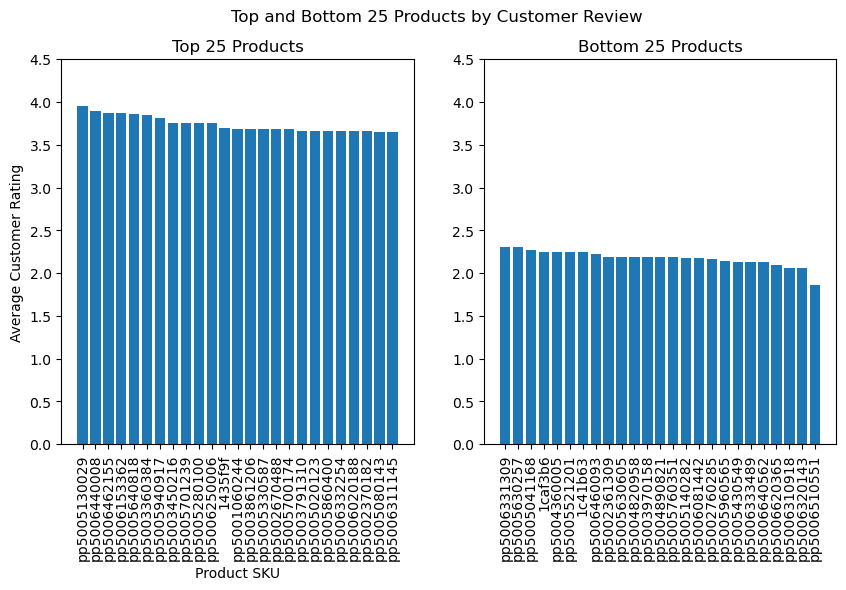

In [170]:
plt.figure(figsize=(10,5))

plt.subplot(121)
plt.title("Top 25 Products")
plt.xlabel("Product SKU")
plt.ylabel("Average Customer Rating")
plt.bar(top_25["sku"],top_25["total_av"])
plt.xticks(rotation=90)
plt.ylim(0,4.5)

plt.subplot(122)
plt.title("Bottom 25 Products")
plt.bar(bottom_25["sku"],bottom_25["total_av"])
plt.xticks(rotation=90)
plt.ylim(0,4.5)

plt.suptitle("Top and Bottom 25 Products by Customer Review")

plt.show()

## Creating a visualisation to look at the overall average product score (for products with more than 10 reviews)

In [171]:
print(top_reviewed.shape)

(798, 3)


In [177]:
product_average = top_reviewed["total_av"].mean()

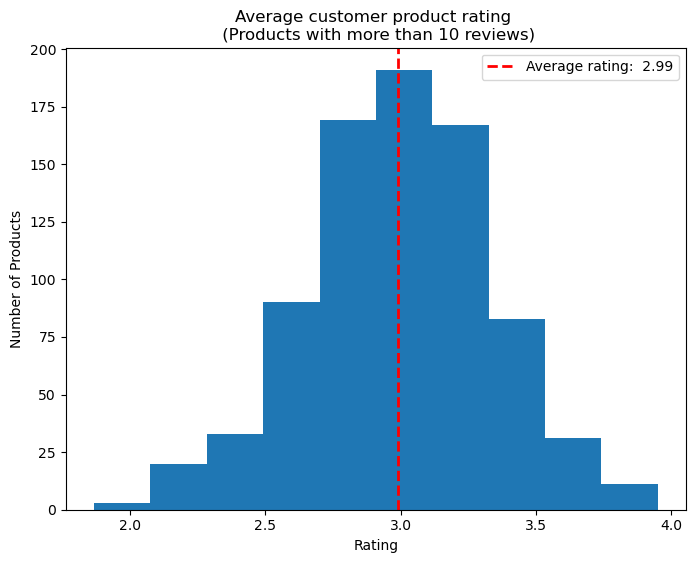

In [180]:
plt.figure(figsize=(8,6))

plt.hist(top_reviewed["total_av"])

plt.axvline(x=product_average,
            color="red",
            linestyle="--",
            linewidth=2,
            label=f"Average rating: {product_average: .2f}")

plt.title("Average customer product rating \n (Products with more than 10 reviews)")
plt.legend()
plt.xlabel("Rating")
plt.ylabel("Number of Products")
plt.show()

## Exploring which brands are best and worst reviewed

In [190]:
df = pd.read_json("jcpenney_products.json", lines=True)
display(df.head())

,uniq_id,sku,name_title,description,list_price,sale_price,category,category_tree,average_product_rating,product_url,product_image_urls,brand,total_number_reviews,Reviews,Bought With
0,b6c0b6bea69c722939585baeac73c13d,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,You'll return to our Alfred Dunner pull-on cap...,41.09,24.16,alfred dunner,jcpenney|women|alfred dunner,2.625,http://www.jcpenney.com/alfred-dunner-essentia...,http://s7d9.scene7.com/is/image/JCPenney/DP122...,Alfred Dunner,8,"[{'User': 'fsdv4141', 'Review': 'You never hav...","[898e42fe937a33e8ce5e900ca7a4d924, 8c02c262567..."
1,93e5272c51d8cce02597e3ce67b7ad0a,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,You'll return to our Alfred Dunner pull-on cap...,41.09,24.16,alfred dunner,jcpenney|women|alfred dunner,3.000,http://www.jcpenney.com/alfred-dunner-essentia...,http://s7d9.scene7.com/is/image/JCPenney/DP122...,Alfred Dunner,8,"[{'User': 'tpcu2211', 'Review': 'You never hav...","[bc9ab3406dcaa84a123b9da862e6367d, 18eb69e8fc2..."
2,013e320f2f2ec0cf5b3ff5418d688528,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,You'll return to our Alfred Dunner pull-on cap...,41.09,24.16,view all,jcpenney|women|view all,2.625,http://www.jcpenney.com/alfred-dunner-essentia...,http://s7d9.scene7.com/is/image/JCPenney/DP122...,Alfred Dunner,8,"[{'User': 'pcfg3234', 'Review': 'You never hav...","[3ce70f519a9cfdd85cdbdecd358e5347, b0295c96d2b..."
3,505e6633d81f2cb7400c0cfa0394c427,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,You'll return to our Alfred Dunner pull-on cap...,41.09,24.16,view all,jcpenney|women|view all,3.500,http://www.jcpenney.com/alfred-dunner-essentia...,http://s7d9.scene7.com/is/image/JCPenney/DP122...,Alfred Dunner,8,"[{'User': 'ngrq4411', 'Review': 'You never hav...","[efcd811edccbeb5e67eaa8ef0d991f7c, 7b2cc00171e..."
4,d969a8542122e1331e304b09f81a83f6,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,You'll return to our Alfred Dunner pull-on cap...,41.09,24.16,view all,jcpenney|women|view all,3.125,http://www.jcpenney.com/alfred-dunner-essentia...,http://s7d9.scene7.com/is/image/JCPenney/DP122...,Alfred Dunner,8,"[{'User': 'nbmi2334', 'Review': 'You never hav...","[0ca5ad2a218f59eb83eec1e248a0782d, 9869fc8da14..."


In [191]:
df.drop(columns = ["product_image_urls", "product_url","Reviews","Bought With","category_tree","category","description"], inplace=True)
display(df.head())

# Making number of columns more manageable

,uniq_id,sku,name_title,list_price,sale_price,average_product_rating,brand,total_number_reviews
0,b6c0b6bea69c722939585baeac73c13d,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,41.09,24.16,2.625,Alfred Dunner,8
1,93e5272c51d8cce02597e3ce67b7ad0a,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,41.09,24.16,3.000,Alfred Dunner,8
2,013e320f2f2ec0cf5b3ff5418d688528,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,41.09,24.16,2.625,Alfred Dunner,8
3,505e6633d81f2cb7400c0cfa0394c427,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,41.09,24.16,3.500,Alfred Dunner,8
4,d969a8542122e1331e304b09f81a83f6,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,41.09,24.16,3.125,Alfred Dunner,8


In [208]:
# Reducing size further to make a subset for the brand exploration

brands = df[["brand","average_product_rating","total_number_reviews"]]
display(brands.head())

,brand,average_product_rating,total_number_reviews
0,Alfred Dunner,2.625,8
1,Alfred Dunner,3.000,8
2,Alfred Dunner,2.625,8
3,Alfred Dunner,3.500,8
4,Alfred Dunner,3.125,8


In [210]:
unique = brands["brand"].unique()
#display(brands)
print(len(unique))

721


In [231]:
# I want to find out what brands have the lowest ratings to see if there are trends but as above, I want to filter out\n
# brands which have less than 10 reviews so we have a reasonable sample size
import pandas as pd

brands_sub = brands.groupby("brand").agg(
    average_rating = ("average_product_rating","mean"), 
    total_reviews = ("total_number_reviews","sum"))

display(brands_sub.head())
print(len(brands_sub))

,average_rating,total_reviews
brand,,
1928 Jewelry,4.750000,3
A.N.A,3.032509,1106
A2 BY AEROSOLES,3.288046,118
ACE BAYOU,2.500000,11
ADIDAS,3.075809,351


721


In [233]:
brands_sorted = brands_sub.sort_values(by = "average_rating", ascending = False)
display(brands_sorted.head())

,average_rating,total_reviews
brand,,
BIALETTI,5.0,1
SKYWAY,5.0,2
Q-T INTIMATES,5.0,1
Bee Darlin Bee Smart,5.0,1
FIFTH AND PARK,5.0,1


In [234]:
x = brands_sorted["total_reviews"] > 10

In [235]:
brands_sorted = brands_sorted[x]

display(brands_sorted.head())

,average_rating,total_reviews
brand,,
CREATIVE BATH,4.200000,12
Nicole By Nicole Miller,4.178571,21
SKYLINE FURNITURE,4.125000,14
UMBRA,3.975000,12
Nordicware,3.916667,20


In [236]:
best_brands = brands_sorted.head(20).reset_index()
worst_brands = brands_sorted.tail(20).reset_index()

In [237]:
display(worst_brands)

,brand,average_rating,total_reviews
0,Z2,2.495000,23
1,I JEANS BY BUFFALO,2.473016,40
2,Dale Tiffany,2.462500,16
3,JAMES READ,2.461538,13
4,Accessories,2.453333,36
5,Studio 1,2.448667,70
6,LICENSED PROPERTIES,2.444444,11
7,FASHION CARDED RINGS,2.428571,18
8,COTTONLOFT,2.425000,13
9,Dingo,2.406250,15


## Plotting the 25 worst reviewed brands - decided not to use this visualisation as I think diplaying as a list is clearer

In [239]:
plt.figure(figsize=(8,6))

plt.barh(y=worst_brands["brand"],width=worst_brands["average_rating"],
        color="firebrick")
#plt.show()

<BarContainer object of 20 artists>

## Exploring customer data

In [241]:
users_csv = pd.read_csv("users.csv")
display(users_csv.head())
print(len(users_csv))

,Username,DOB,State
0,bkpn1412,31.07.1983,Oregon
1,gqjs4414,27.07.1998,Massachusetts
2,eehe1434,08.08.1950,Idaho
3,hkxj1334,03.08.1969,Florida
4,jjbd1412,26.07.2001,Georgia


5000


In [242]:
users_json = pd.read_json("jcpenney_reviewers.json", lines=True)
display(users_json)
print(len(users_json))

,Username,DOB,State,Reviewed
0,bkpn1412,31.07.1983,Oregon,[cea76118f6a9110a893de2b7654319c0]
1,gqjs4414,27.07.1998,Massachusetts,[fa04fe6c0dd5189f54fe600838da43d3]
2,eehe1434,08.08.1950,Idaho,[]
3,hkxj1334,03.08.1969,Florida,"[f129b1803f447c2b1ce43508fb822810, 3b0c9bc0be6..."
4,jjbd1412,26.07.2001,Georgia,[]
...,...,...,...,...
4995,mfnn1212,27.07.1997,Delaware,[d6cd506246bd17afa611b6a06236713c]
4996,ejnb3414,01.08.1976,Minnesota,[97de1506cd0bcbe50f2797cd0588eb81]
4997,pdzw1433,28.07.1994,Ohio,"[799d62906019d910fa744987da184ae7, b8f5deb7b02..."
4998,npha1342,07.08.1953,Montana,[6250b1d691cd3842f05b87736f2fadbf]


5000


In [246]:
#Finding out how many states are represented in the data

states = users_csv["State"].unique()
display(states)

array(['Oregon', 'Massachusetts', 'Idaho', 'Florida', 'Georgia',
       'Montana', 'Pennsylvania', 'Connecticut', 'Arkansas', 'Nebraska',
       'California', 'New Hampshire', 'District of Columbia',
       'Washington', 'Minnesota', 'New Mexico', 'Virginia', 'Kansas',
       'Illinois', 'North Dakota', 'Colorado', 'New York',
       'Minor Outlying Islands', 'Northern Mariana Islands',
       'West Virginia', 'Texas', 'South Dakota', 'Maryland', 'Maine',
       'Ohio', 'Rhode Island', 'Michigan', 'Alaska', 'Iowa', 'Oklahoma',
       'Mississippi', 'South Carolina', 'Missouri', 'New Jersey',
       'Tennessee', 'North Carolina', 'Guam', 'Wyoming', 'Delaware',
       'Vermont', 'Indiana', 'Louisiana', 'Wisconsin', 'Hawaii',
       'Puerto Rico', 'Alabama', 'Kentucky', 'Arizona', 'Nevada', 'Utah',
       'American Samoa', 'U.S. Virgin Islands'], dtype=object)

In [269]:
#Finding out how many users there are per state

state_count = users_csv["State"].value_counts()

In [271]:
#print(state_count)

## Plotting data to show states which have highest and lowest number of users/customers

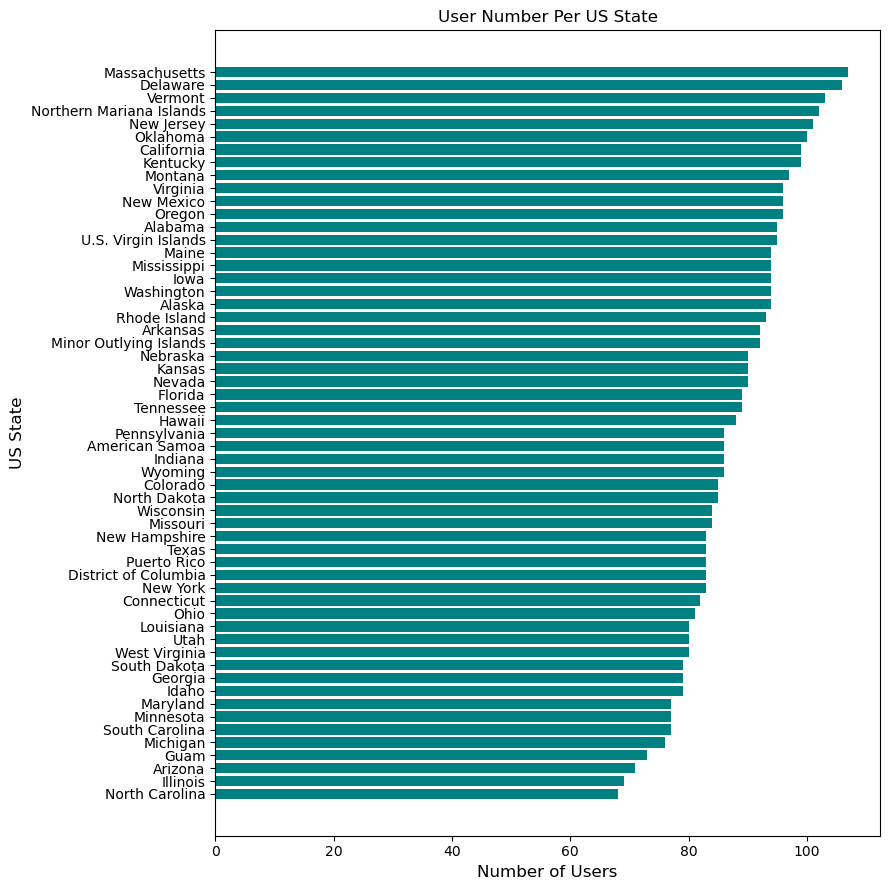

In [279]:
plt.figure(figsize=(9,9))

plt.barh(y=state_count.index,
         width=state_count.values,
         color="teal")

plt.title("User Number Per US State")
plt.xlabel("Number of Users", fontsize=12)
plt.ylabel("US State", fontsize=12)

plt.tight_layout()

plt.gca().invert_yaxis()
plt.show()


## Plotting users per state on US map with Plotly

In [280]:
import plotly.graph_objects as go

In [281]:
users = pd.read_csv("users.csv")

In [283]:
# Creating a subset which shows users per state

state_counts = users["State"].value_counts().reset_index()
state_counts.columns = ["State", "user_count"]

In [284]:
display(state_counts.head())

,State,user_count
0,Massachusetts,107
1,Delaware,106
2,Vermont,103
3,Northern Mariana Islands,102
4,New Jersey,101


In [ ]:
mymap = go.Layout(
    title = go.layout.Title(
        text = "Users Per US State"
    ),
    geo = go.layout.Geo(
        scope = 'usa',
        projection = go.layout.geo.Projection(type = 'albers usa'),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)'),
)

sub_data = [go.Choropleth(
#    colorscale = scl,
    autocolorscale = True,
    locations = users_json['State'],
    z = users_json["State"].astype(float), # Data to be color-coded
    locationmode = 'USA-states',
    marker = go.choropleth.Marker(
        line = go.choropleth.marker.Line(
            color = 'rgb(255,255,255)',
            width = 2
        )),
    colorbar = go.choropleth.ColorBar(
        title = "Example")
)]